# HomeTask: Conjugate distributions



Suppose we have a parameter $\theta$ (considered as a random variable) and an observation $x$  According to Bayes' theorem, the **posterior distribution** of $\theta$ given $x$ is calculated as follows:

$$
p(\theta|x) = \frac{p(x|\theta)p(\theta)}{\int_{\theta} p(x|\theta)p(\theta) d\theta}
$$

Where:

- $p(\theta)$ is the **prior distribution**, representing our initial belief about the parameter $\theta$.
- $p(x|\theta)$ is the **likelihood**, indicating how likely the observed data $x$ is given $\theta$.

If the resulting **posterior distribution** $p(\theta|x)$ belongs to the same family of probability distributions as the prior distribution $p(\theta)$ (i.e., it has the same form but with updated parameters), then this family of distributions is called the **conjugate family** with respect to the likelihood $p(x|\theta)$. In this case, the prior distribution $p(\theta)$ is said to be a **conjugate prior** for the likelihood function $p(x|\theta)$.

###  Beta and Bernoulli (or Binomial) Conjugate Priors

The **uniform distribution** is a special case of the Beta distribution with parameters $\text{Beta}(1, 1)$. More generally, any Beta distribution is conjugate to the Bernoulli distribution. This means that if you start with a Beta prior and observe Bernoulli data, you will obtain a Beta posterior. This property simplifies Bayesian analysis significantly.

### Beta Distribution

The Beta distribution for a parameter $\theta$ over the interval $[0, 1]$ is given by:

$$
f(\theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}
$$

$$ \pi(\theta) ~\sim~ \text{Beta}(a,b) $$
$$ x\,|\,n,\theta ~\sim~ \text{Binom}(n,p) $$
$$ \theta \,|\, x,n ~\sim~ \text{Beta}(\alpha,\beta).$$



$$ \alpha = a + x $$
$$ \beta = b + n - x $$

$$X \sim \text{Beta}(a,b), \qquad E(X) = \frac{a}{a+b}$$

### Gamma-Poisson conjugate distribution
The Poisson distribution has a single parameter $\lambda$, which is the average value for an event over a given time period: 
$$p(k)\equiv \mathbb {P} (Y=k)={\frac {\lambda ^{k}}{k!}}\,e^{-\lambda },$$

Prior for $\lambda$ is Gamma distribution


$$
f(\lambda | a, b) = \frac{b^{a}}{\Gamma(a)} \lambda^{a - 1} e^{-b a}, \quad \lambda > 0
$$



The Gamma-Poisson distribution is another example of a conjugate family, where using the Gamma distribution as a priori for the parameter $\lambda$ of the Poisson distribution results in a posterior for $\lambda$ distributed as Gamma with other parameters:
$$ \pi(\lambda) ~\sim~ \text{Gamma}(a,b) $$
$$ p(x|\lambda) ~\sim~ \text{Pois}(\lambda) $$
$$ p(\lambda|x) ~\sim~ \text{Gamma}(\alpha,\beta).$$


Since the Poisson distribution models a random variable describing the number of events that occur over a given time, it is possible to use this model to estimate the average consumption of fruits and vegetables.
The a priori parameters of the Gamma distribution can be interpreted as the number of events ($a$) for a certain period ($b$). For example, the number of fruits for a certain number of days.

In this case, the rule for updating parameters for one observation with a specific value for one period is as follows:
$$ \alpha = a + x $$
$$ \beta = b + 1 $$

For a series of observations:
$$ \alpha = a + \sum_{i = 1}^n x_i$$
$$ \beta = b + n $$


In [38]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (6,3)

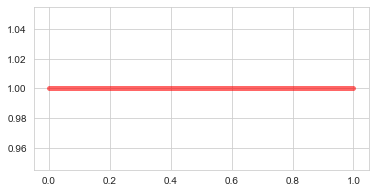

In [39]:
#example: Uniform, or Beta(1,1)
a, b = 1, 1
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf');

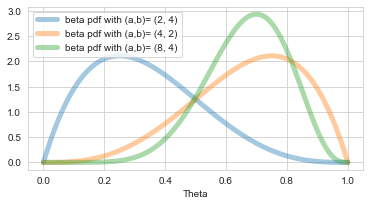

In [40]:
#example Beta distributions with different a, b

x = np.linspace(0, 1, 100)
params = [(2,4), (4,2), (8,4)]
for param in params:
    plt.plot(x, stats.beta.pdf(x, param[0], param[1]), lw=5, alpha=0.4, label=f'beta pdf with (a,b)= {param}');
    plt.xlabel(f"Theta")
    plt.legend()


In [41]:
# if you want to estimate P(theta>0.25)
print(1- stats.beta.cdf(0.25, 8, 4))
print(1- stats.beta.cdf(0.25, 4, 8))

0.9988117218017578
0.7133045196533203


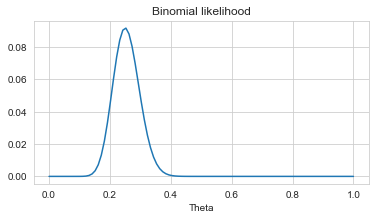

In [42]:
#example for Binomial likelihood

x = np.linspace(0, 1, 100)
plt.plot(x, stats.binom.pmf(25, 100, x));
plt.title("Binomial likelihood");
plt.xlabel(f"Theta");


## Task 1

Suppose we are giving two students a multiple-choice exam with 40 questions, 
where each question has four choices. We don't know how much the students have studied for this exam, but we think that they will do better than just guessing randomly. 
Answer to the next question (share with me notebook with results)
    
    1) What are the parameters of interest?
    2) What is our likelihood?
    3) What prior should we use?
    4) What is the prior probability P(theta>.25)? P(theta>.5)? P(theta>.8)?
    5) Suppose the first student gets 33 questions right. What is the posterior
     distribution for theta1? Compute P(theta1>.25)? P(theta1>.5)? P(theta1>.8)? What is a 95% posterior credible interval for theta1?
    6) Suppose the second student gets 24 questions right. What is the posterior distribution for theta2? P(theta2>.25)? P(theta2>.5)? P(theta2>.8)? What is a 95% posterior credible interval for theta2?
    7) What is the posterior probability that theta1>theta2, i.e., that the 
    first student has a better chance of getting a question right than
    the second student?

## Task 2
Download the popular dataset [CDC's Behavioural Risk Factor Surveillance System](http://www.cdc.gov/brfss/) (BRFSS).


- Based on the available sample, construct Bayesian confidence intervals for the proportion of the male and female population in the US.

- Now estimate the proportion of the population in which at least one time in the past 30 days they did any physical activity (exercise column)

- Estimate separately for men and women

[Download dataset]({download}`../data/brfss.csv`)

In [78]:
df = pd.read_csv("brfss.csv", index_col = 0)
df.head()

,weight,height,sex,exercise,fruit_per_day,vege_per_day
1,190,71,Male,Yes,0,0
2,130,60,Female,Yes,4,1
3,137,64,Female,Yes,2,1
4,197,77,Male,No,0,0
5,165,66,Male,Yes,2,1


## Task 3
What can be said about fruit and vegetable intake per day? Is the intake in line with the recommended dose of 4-5 portions of fruit or vegetables per day?
Compute 95% equal tailed credible interval